COMPLETE PATHWAY ANALYSIS: MYOCARDIAL INFARCTION
Method: Deviation-from-Reference (10-year lookback)

1. LOADING FULL DATASET
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000

2. DISCOVERING PATHWAYS TO MYOCARDIAL INFARCTION
Using Deviation-from-Reference Method (10-year lookback)
=== DISCOVERING PATHWAYS TO MYOCARDIAL INFARCTION ===
Method: deviation_from_reference
Lookback years: 10
Found target disease: Myocardial infarction (index 112)
Found 24920 patients who developed myocardial infarction

Creating trajectory features for pathway discovery...
Method: deviation_from_reference

--- COMPUTING POPULATION REFERENCE FOR DEVIATION-BASED CLUSTERING ---
Computing population-level signature reference from all 400000 patients...
Population reference shape: (21, 52)
Created 210 features 

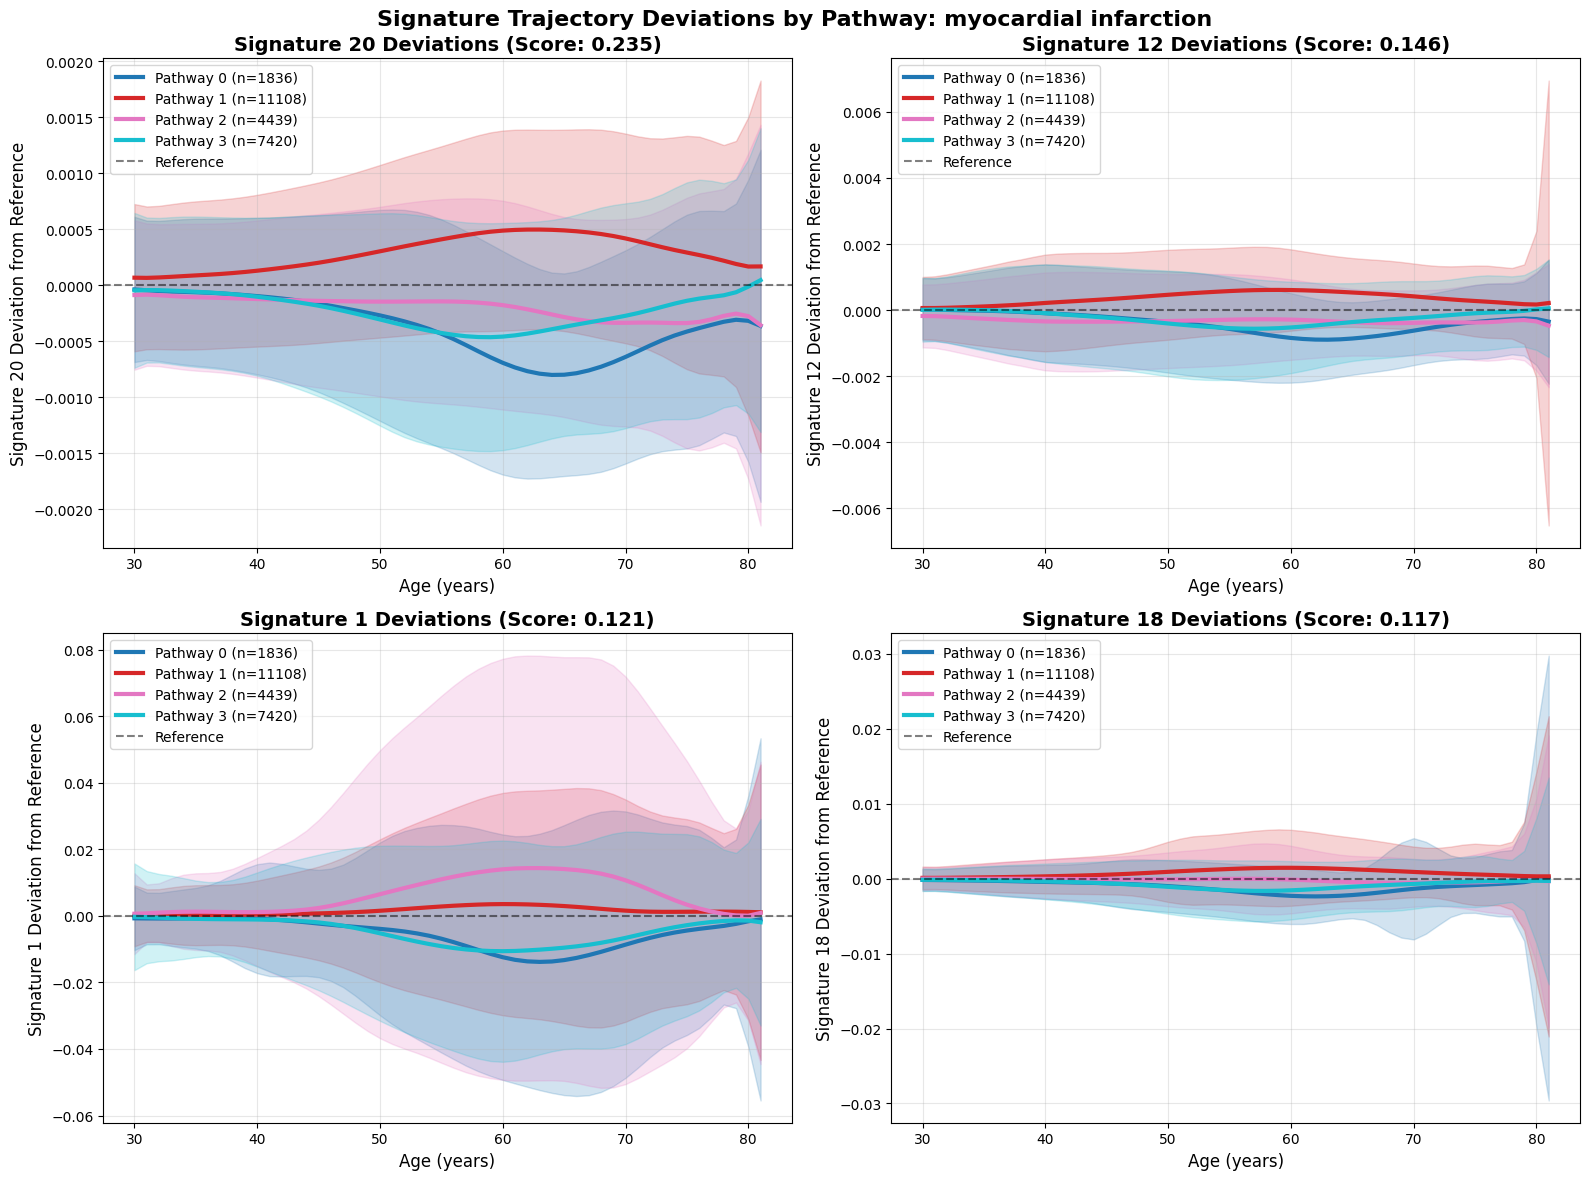

   Saved plot: output_10yr/pathway_size_and_age.pdf


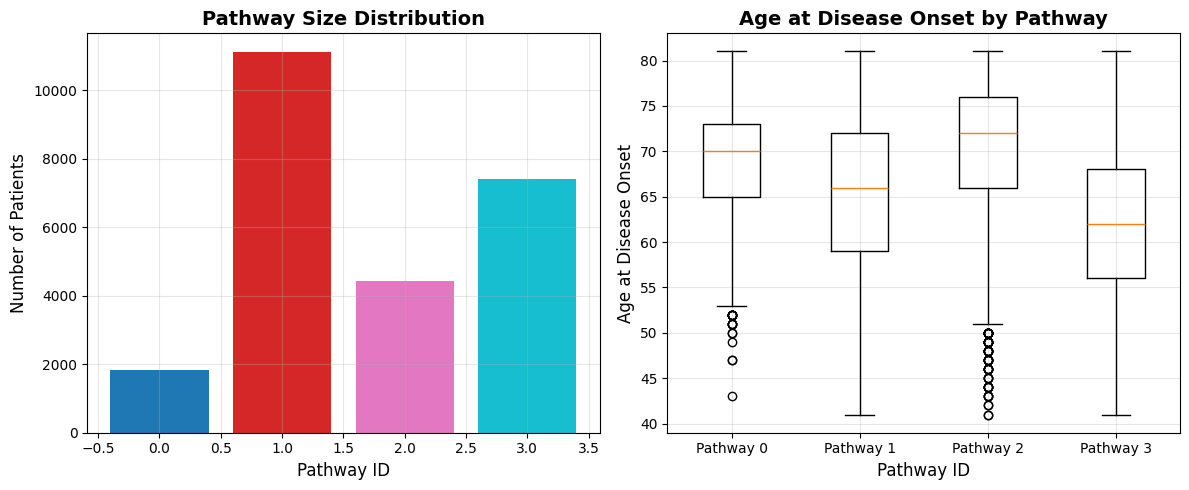


6. CREATING STACKED SIGNATURE DEVIATION PLOTS:
   Saved plot: output_10yr/signature_deviations_by_pathway.pdf


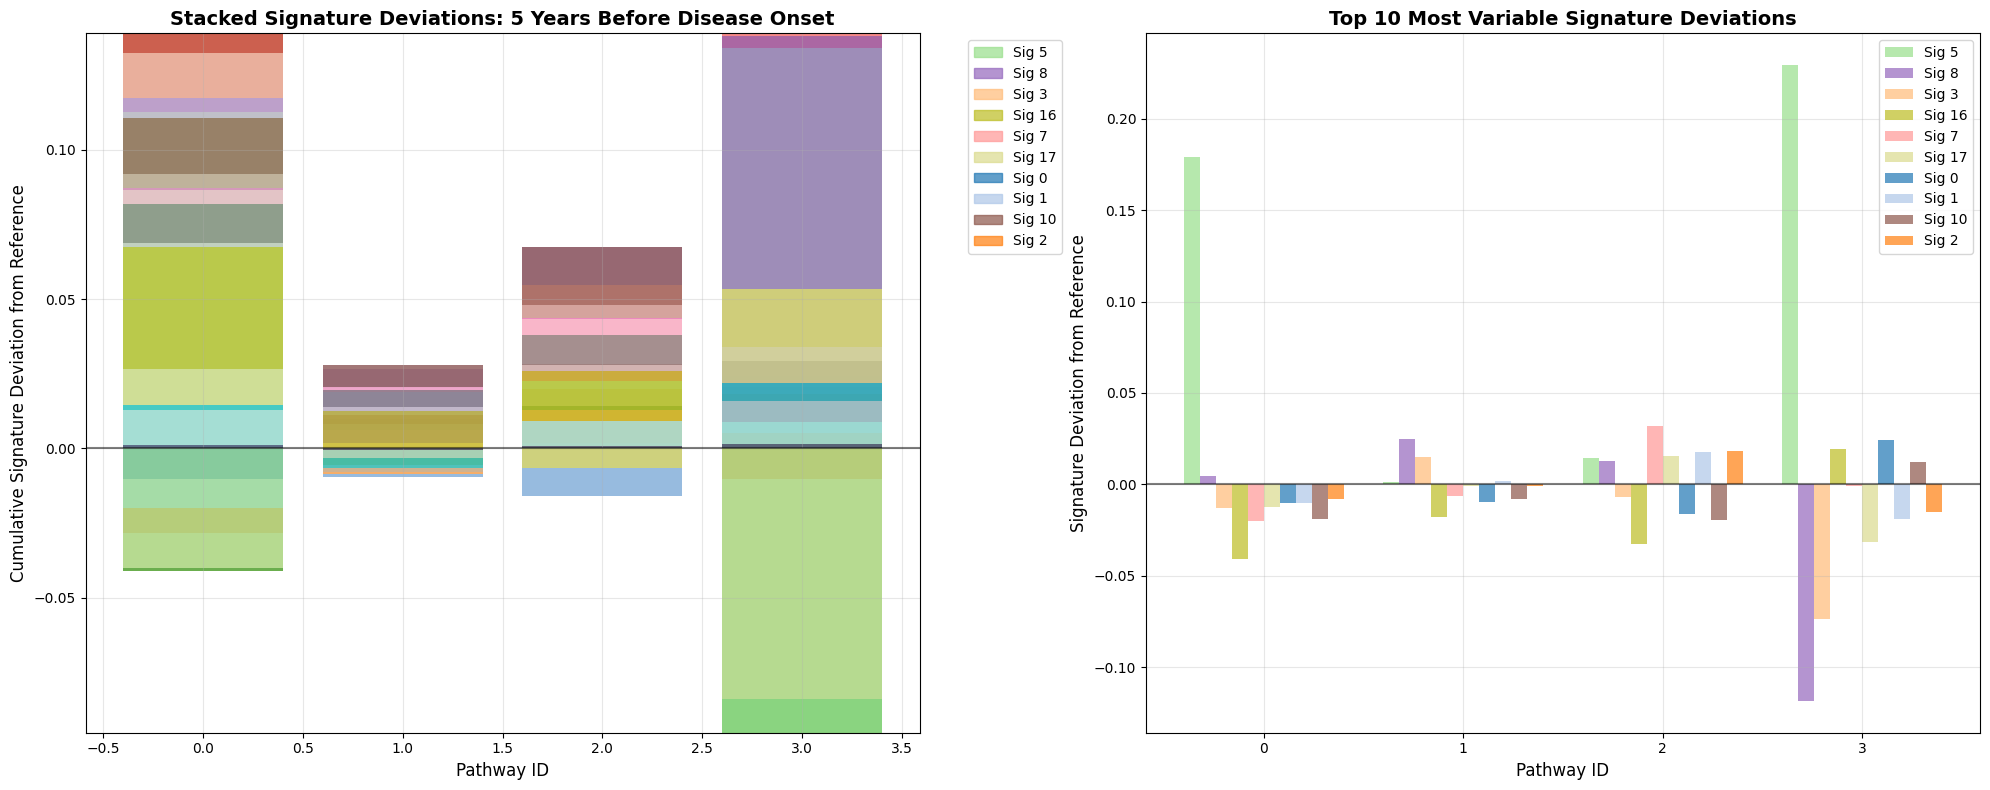


Summary of signature deviations (5 years before disease):
  Pathway 0: Total absolute deviation = 0.370
    Top 3 signatures: [(5, 0.17910814), (16, -0.041025706), (7, -0.019809388)]
  Pathway 1: Total absolute deviation = 0.112
    Top 3 signatures: [(8, 0.02484078), (16, -0.017946318), (3, 0.0149342865)]
  Pathway 2: Total absolute deviation = 0.223
    Top 3 signatures: [(16, -0.032341897), (7, 0.031873554), (10, -0.019288678)]
  Pathway 3: Total absolute deviation = 0.615
    Top 3 signatures: [(5, 0.22926128), (8, -0.118373916), (3, -0.073842525)]

3b. CREATING SIGNATURE DEVIATION PLOTS
   Saved signature deviation plot: output_10yr/signature_deviations_myocardial_infarction_10yr.pdf

4. ANALYZING MEDICATION DIFFERENCES BY PATHWAY
=== INTEGRATING LONG-TERM MEDICATIONS WITH SIGNATURE PATHWAYS ===
Loading medication data from /Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/gp_scripts.txt...
✅ Loaded 56,212,343 prescription records
   From 222,044 unique patients
   Covering

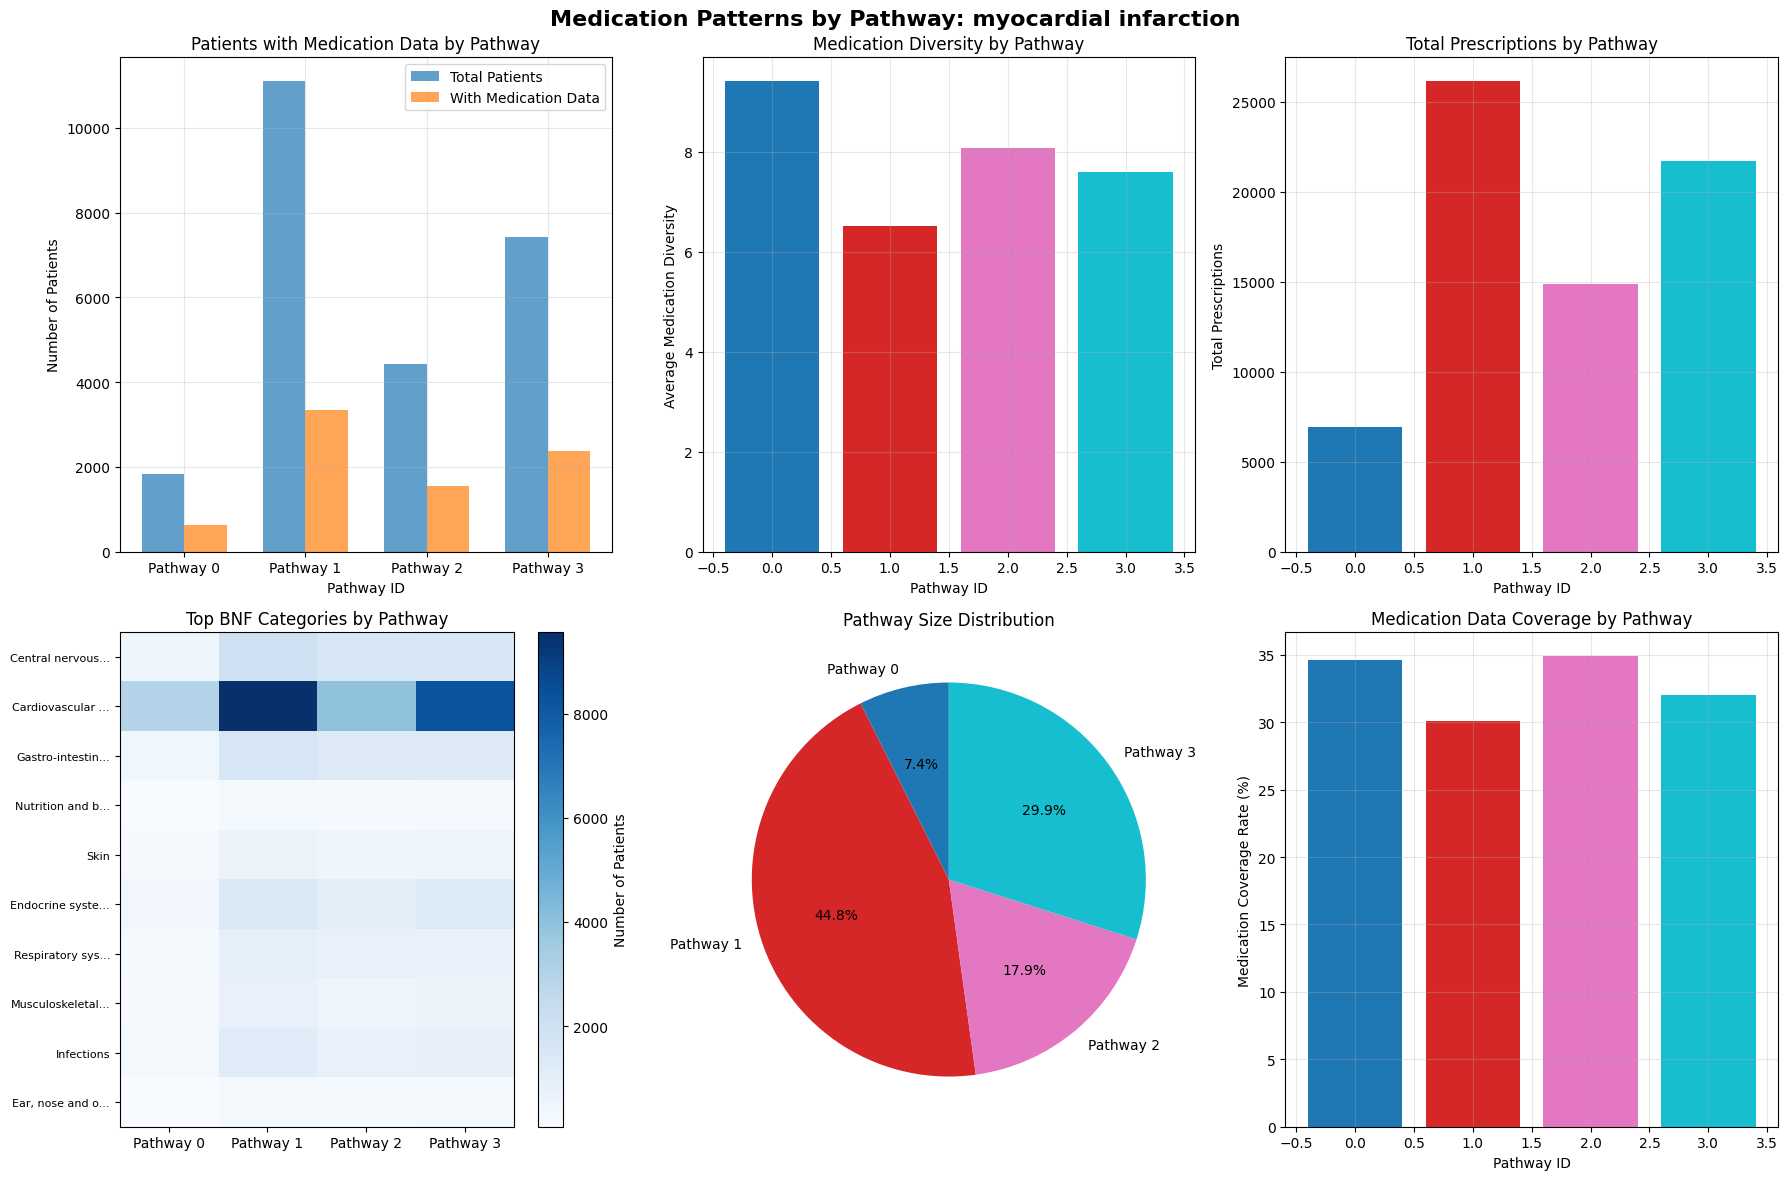


=== MEDICATION INTEGRATION SUMMARY ===
Target Disease: myocardial infarction
Total Pathways: 4
Total Patients: 24803
Patients with Medication Data: 7902

Pathway 0:
  Patients: 1836
  With meds: 636
  Coverage: 34.6%
  Medication diversity: 9.42
  Total prescriptions: 6949

Pathway 1:
  Patients: 11108
  With meds: 3343
  Coverage: 30.1%
  Medication diversity: 6.52
  Total prescriptions: 26169

Pathway 2:
  Patients: 4439
  With meds: 1550
  Coverage: 34.9%
  Medication diversity: 8.08
  Total prescriptions: 14871

Pathway 3:
  Patients: 7420
  With meds: 2373
  Coverage: 32.0%
  Medication diversity: 7.60
  Total prescriptions: 21700

5. ANALYZING PRS DIFFERENCES BY PATHWAY

=== ANALYZING POLYGENIC RISK SCORES BY PATHWAY ===
✅ Loaded PRS data: (400000, 37)
Available PRS columns: ['PatientID', 'AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG',

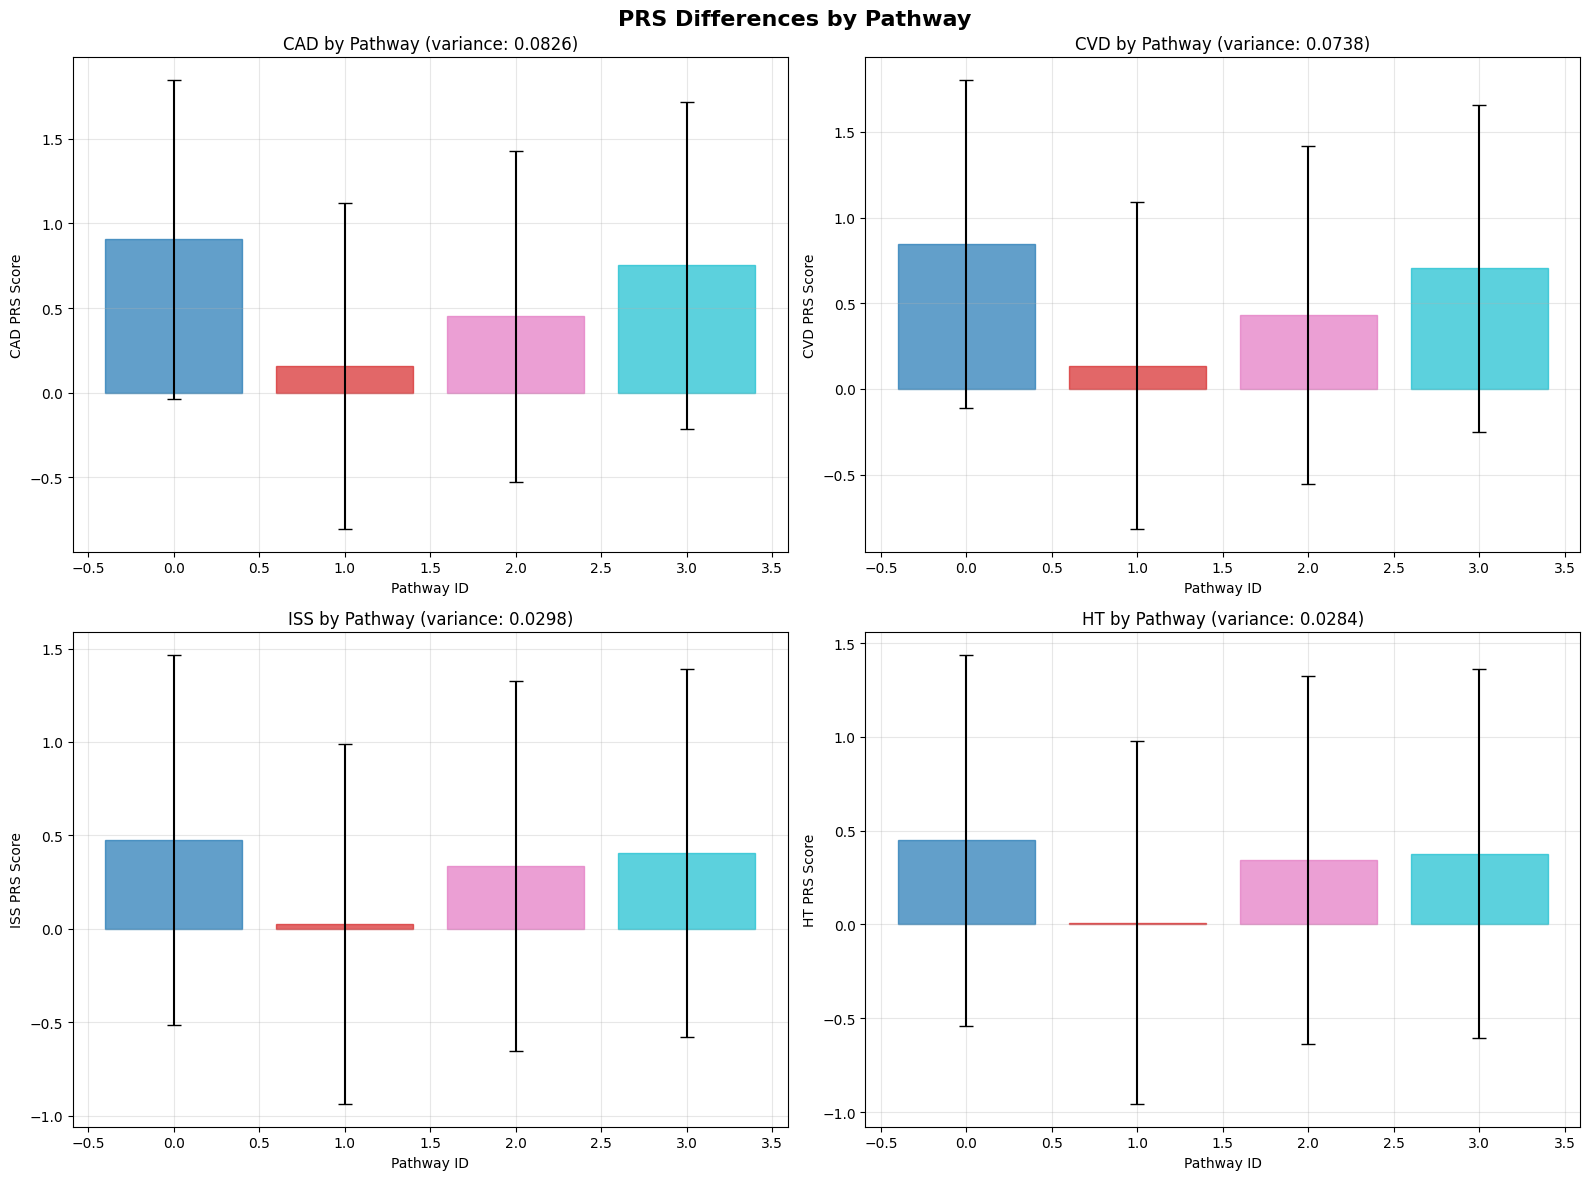


6. ANALYZING GRANULAR DISEASE PATTERNS

=== ANALYZING GRANULAR DISEASE PATTERNS BY PATHWAY ===
Including diseases with ≥1.0% prevalence in at least one pathway

DISEASES THAT DIFFERENTIATE PATHWAYS (including rare diseases):
Found 236 diseases with sufficient prevalence
Top 20 diseases that differentiate pathways (including rare diseases):

1. Coronary atherosclerosis (max prevalence: 86.3%):
   Pathway 0: 1584 patients (86.3%)
   Pathway 1: 927 patients (8.3%)
   Pathway 2: 902 patients (20.3%)
   Pathway 3: 1183 patients (15.9%)

2. Angina pectoris (max prevalence: 75.0%):
   Pathway 0: 1377 patients (75.0%)
   Pathway 1: 823 patients (7.4%)
   Pathway 2: 1014 patients (22.8%)
   Pathway 3: 915 patients (12.3%)

3. Other chronic ischemic heart disease, unspecified (max prevalence: 74.7%):
   Pathway 0: 1371 patients (74.7%)
   Pathway 1: 982 patients (8.8%)
   Pathway 2: 1048 patients (23.6%)
   Pathway 3: 935 patients (12.6%)

4. Hypercholesterolemia (max prevalence: 75.9%):
   Pat

In [1]:
from run_complete_pathway_analysis_deviation_only import run_deviation_only_analysis

# 10-year lookback (default - better biological separation)
results = run_deviation_only_analysis("myocardial infarction", n_pathways=4, 
                                     output_dir='output_10yr', lookback_years=10)


Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000
TRANSITION SIGNATURE ANALYSIS: MYOCARDIAL INFARCTION
=== FINDING DISEASE TRANSITIONS TO MYOCARDIAL INFARCTION ===
Target disease: Myocardial infarction (index 112)
Found transition disease: Rheumatoid arthritis (index 297)
Found transition disease: Type 1 diabetes (index 46)
Found transition disease: Essential hypertension (index 109)
Found transition disease: Hypercholesterolemia (index 52)
Found transition disease: Obesity (index 60)
Found transition disease: Major depressive disorder (index 66)
Found transition disease: Anxiety disorder (index 67)
Found 24920 patients with myocardial infarction

=== TRANSITION GROUP SUMMARY ===
rheumatoid arthritis: 509 patients
diabetes: 533 patients
hypertension: 8650 patients
hypercholesterolemi

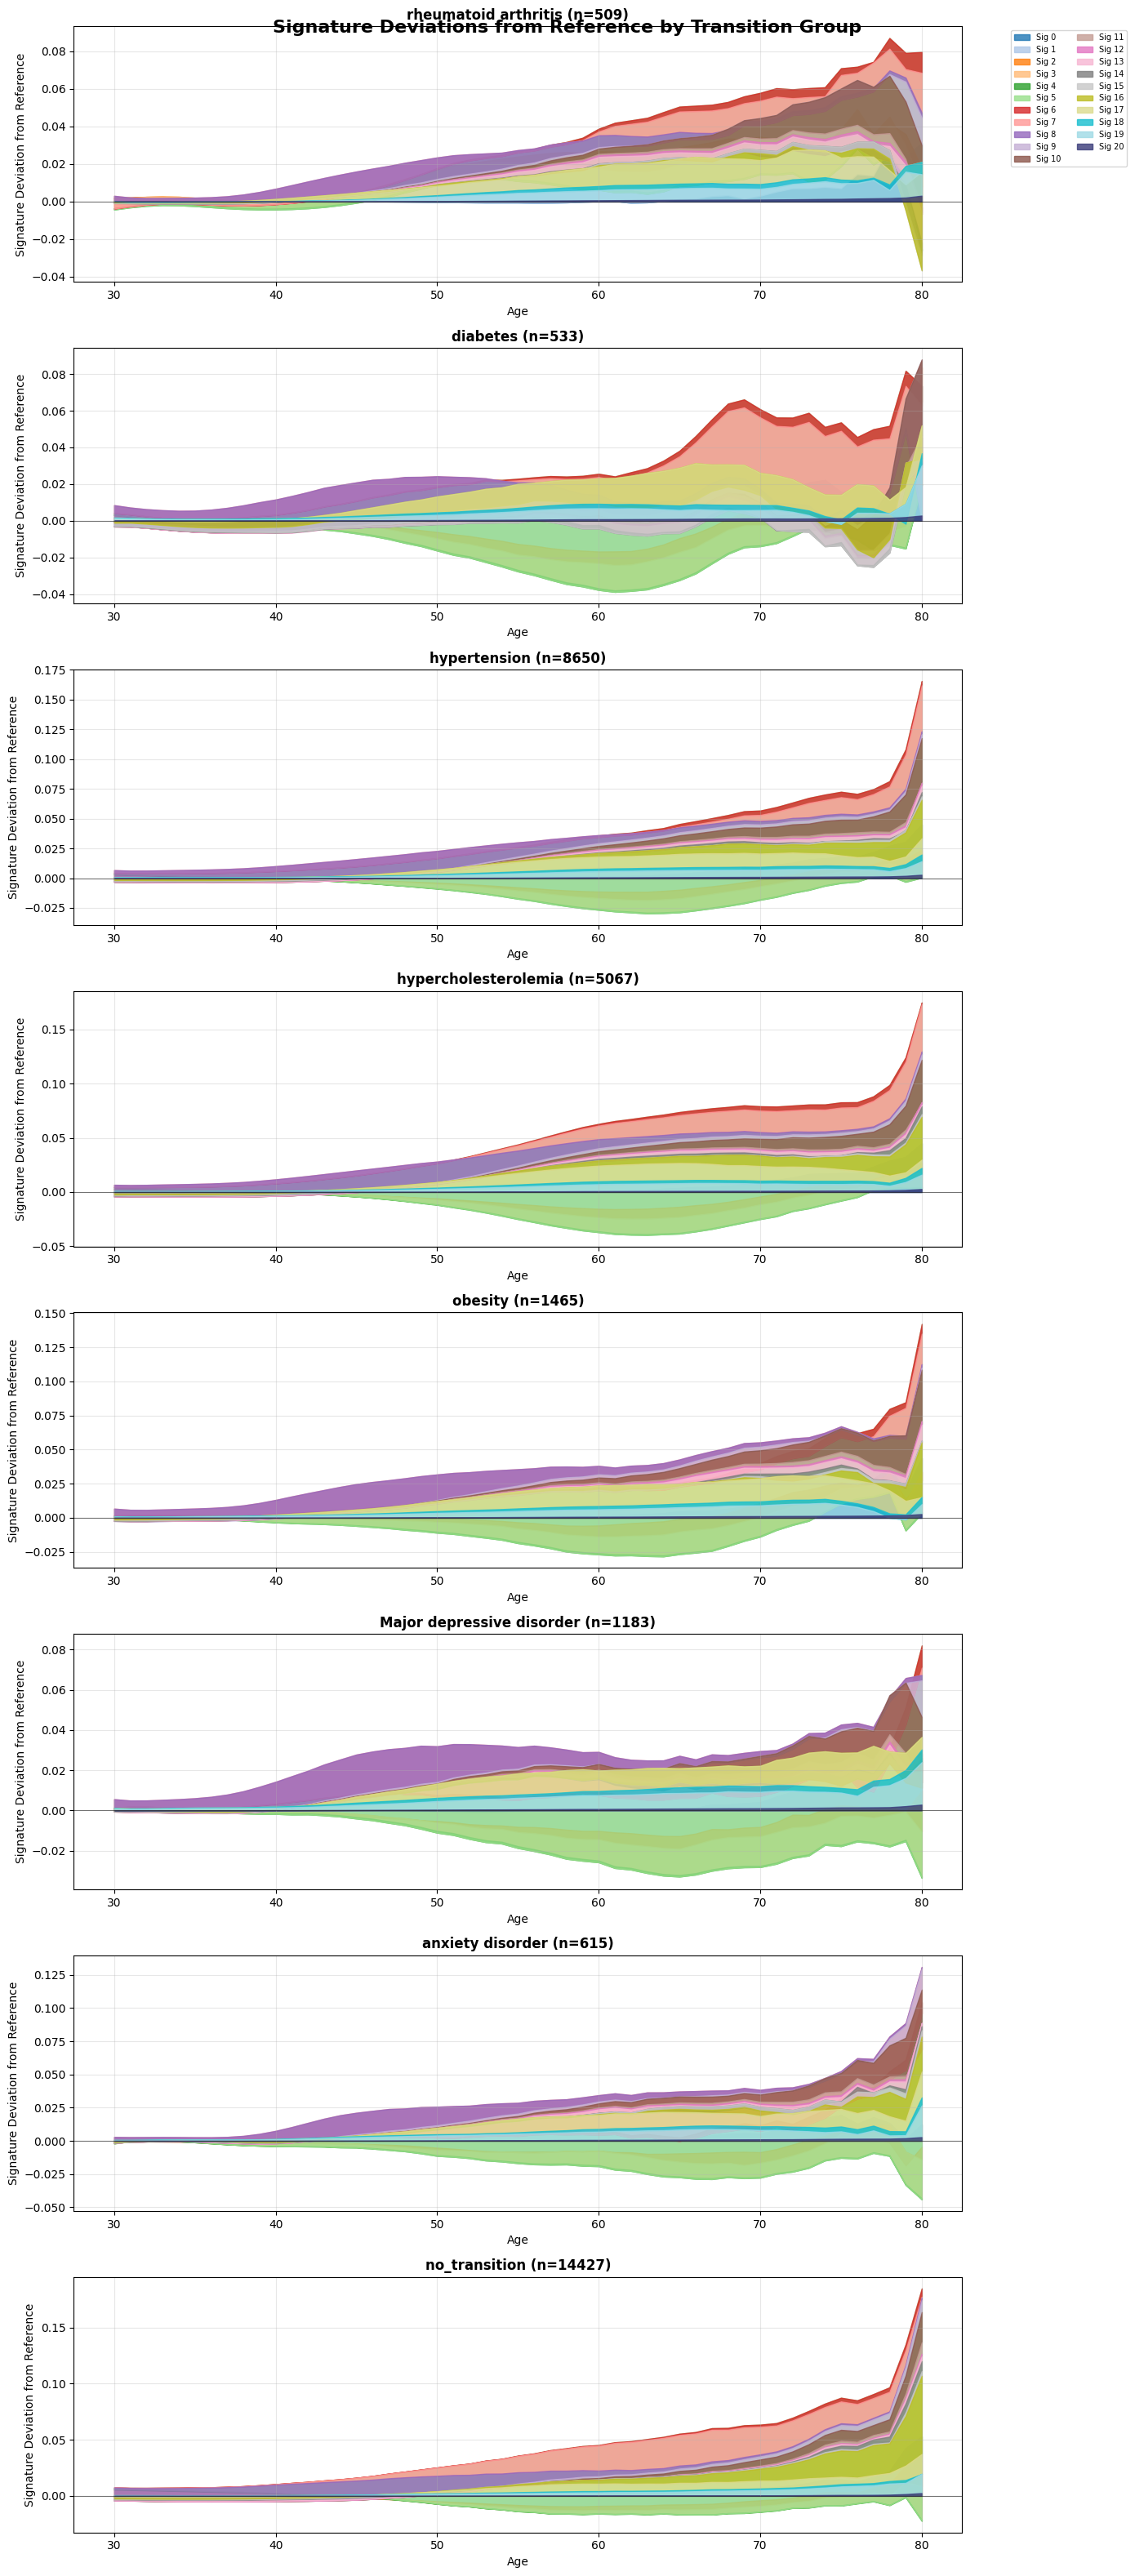

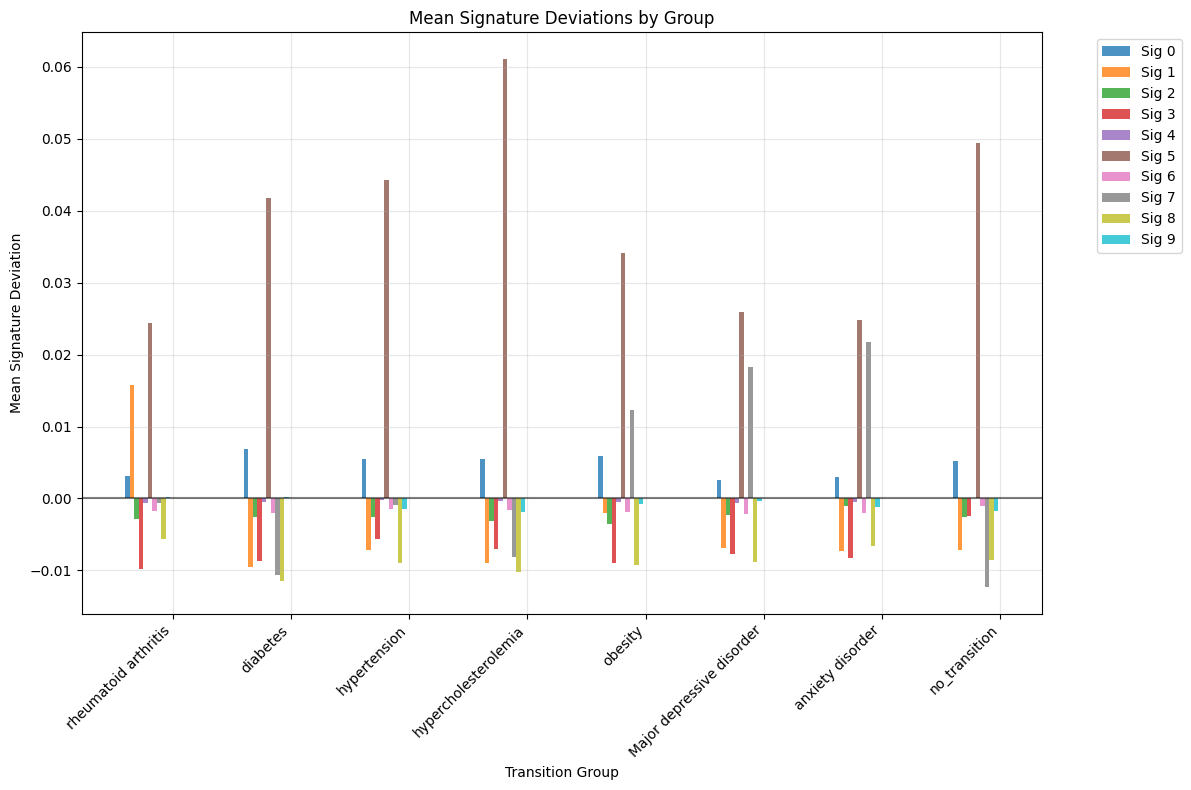

✅ Created R-style visualizations for 8 transition groups


In [3]:
# Run the fixed transition analysis to get meaningful statistics
from transition_signature_analysis import run_transition_analysis

import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')


from pathway_discovery import load_full_data

# Load data
Y, thetas, disease_names, processed_ids = load_full_data()

# Define transition diseases to analyze
transition_diseases = [
    "rheumatoid arthritis",
    "diabetes", 
    "hypertension",
    "hypercholesterolemia",
    "obesity",
    "Major depressive disorder",
    "anxiety disorder"
]

# Run the analysis
results = run_transition_analysis(
    target_disease="myocardial infarction",
    transition_diseases=transition_diseases,
    Y=Y,
    thetas=thetas,
    disease_names=disease_names,
    processed_ids=processed_ids
)



BC PROGRESSION ANALYSIS (MATCHED ON AGE AT BC DIAGNOSIS)
  Precursor: Breast cancer
  Target: myocardial infarction
  Plotting: 10 years leading up to MI
  Age tolerance: ±5 years

Found transition disease: Breast cancer [female] (index 16)
Found target disease: Myocardial infarction (index 112)
Population reference shape: (21, 52)
Found 64 BC patients who develop MI
Found 3332 BC patients who DON'T develop MI

=== AGE MATCHING AT BC DIAGNOSIS ===
Found 64 age-matched pairs
Average time from BC to MI: 9 years

Analyzing 10 years
Progressors (BC→MI): 64 patients
Non-progressors (BC only): 60 patients

Plot saved as 'bc_progression_Breast_cancer_matched_on_bc_age.png'


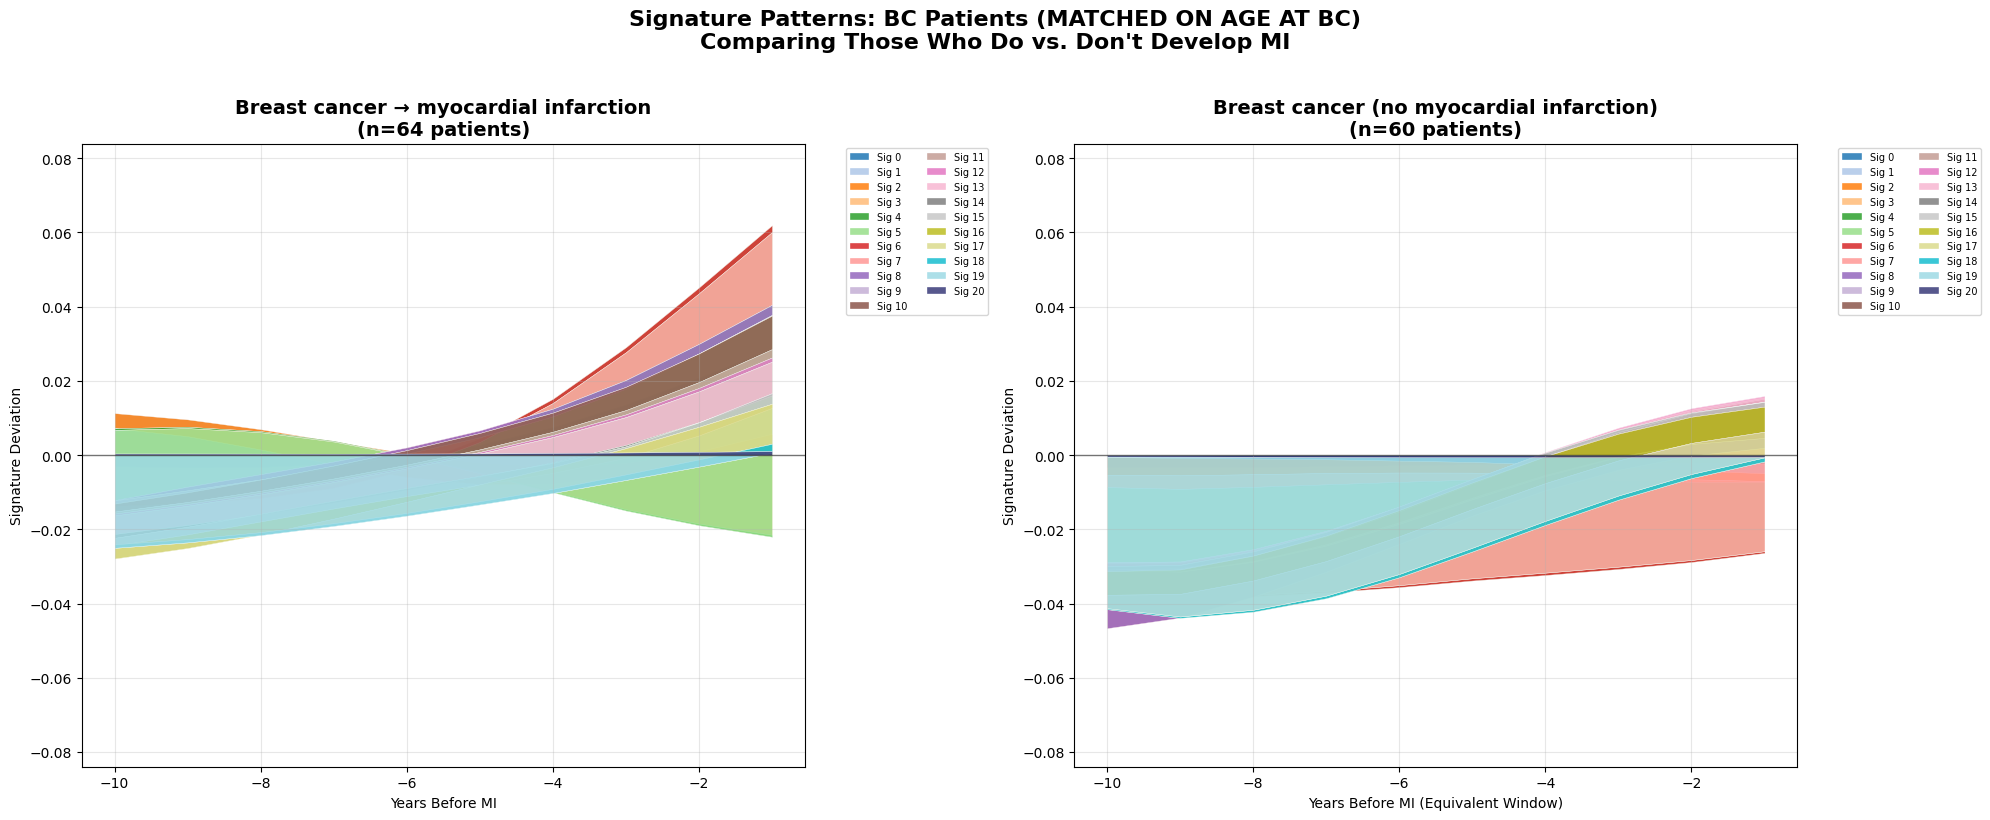

In [5]:

from plot_transition_deviations import plot_bc_to_mi_progression

results = plot_bc_to_mi_progression(
    transition_disease_name='Breast cancer',
    target_disease_name='myocardial infarction',
    Y=Y,
    thetas=thetas,
    disease_names=disease_names,
    years_before=10,       # Years leading up to MI
    age_tolerance=5,        # Match within ±5 years
    min_followup=5,         # Minimum follow-up
    save_plots=True
)


COMPARING SIGNATURE DEVIATIONS (AGE-MATCHED + FOLLOW-UP):
  Transition disease: Breast cancer
  Target disease: myocardial infarction
  Age tolerance: ±5 years
  Min follow-up: 5 years

Found transition disease: Breast cancer [female] (index 16)
Found target disease: Myocardial infarction (index 112)

Found 3501 patients with Breast cancer

Initial patient groups:
  With myocardial infarction: 75 patients
  Without myocardial infarction: 3426 patients

=== AGE MATCHING ===
Age at Breast cancer for target group: 46.0 - 78.0
Found 75 age-matched pairs

=== FOLLOW-UP CHECK ===
Control patient 206047: only 2.0 years follow-up (excluded)
After follow-up check: 74 valid pairs

Calculated deviations (AGE-MATCHED + FOLLOW-UP):
  With target: 67 patients
  Without target: 65 patients
  Both groups analyzed: 10 years AFTER Breast cancer diagnosis
  Target group age: 62.4 ± 8.2
  Control group age: 62.4 ± 7.6

Plot saved as 'transition_deviations_age_matched_Breast_cancer_to_myocardial_infarctio

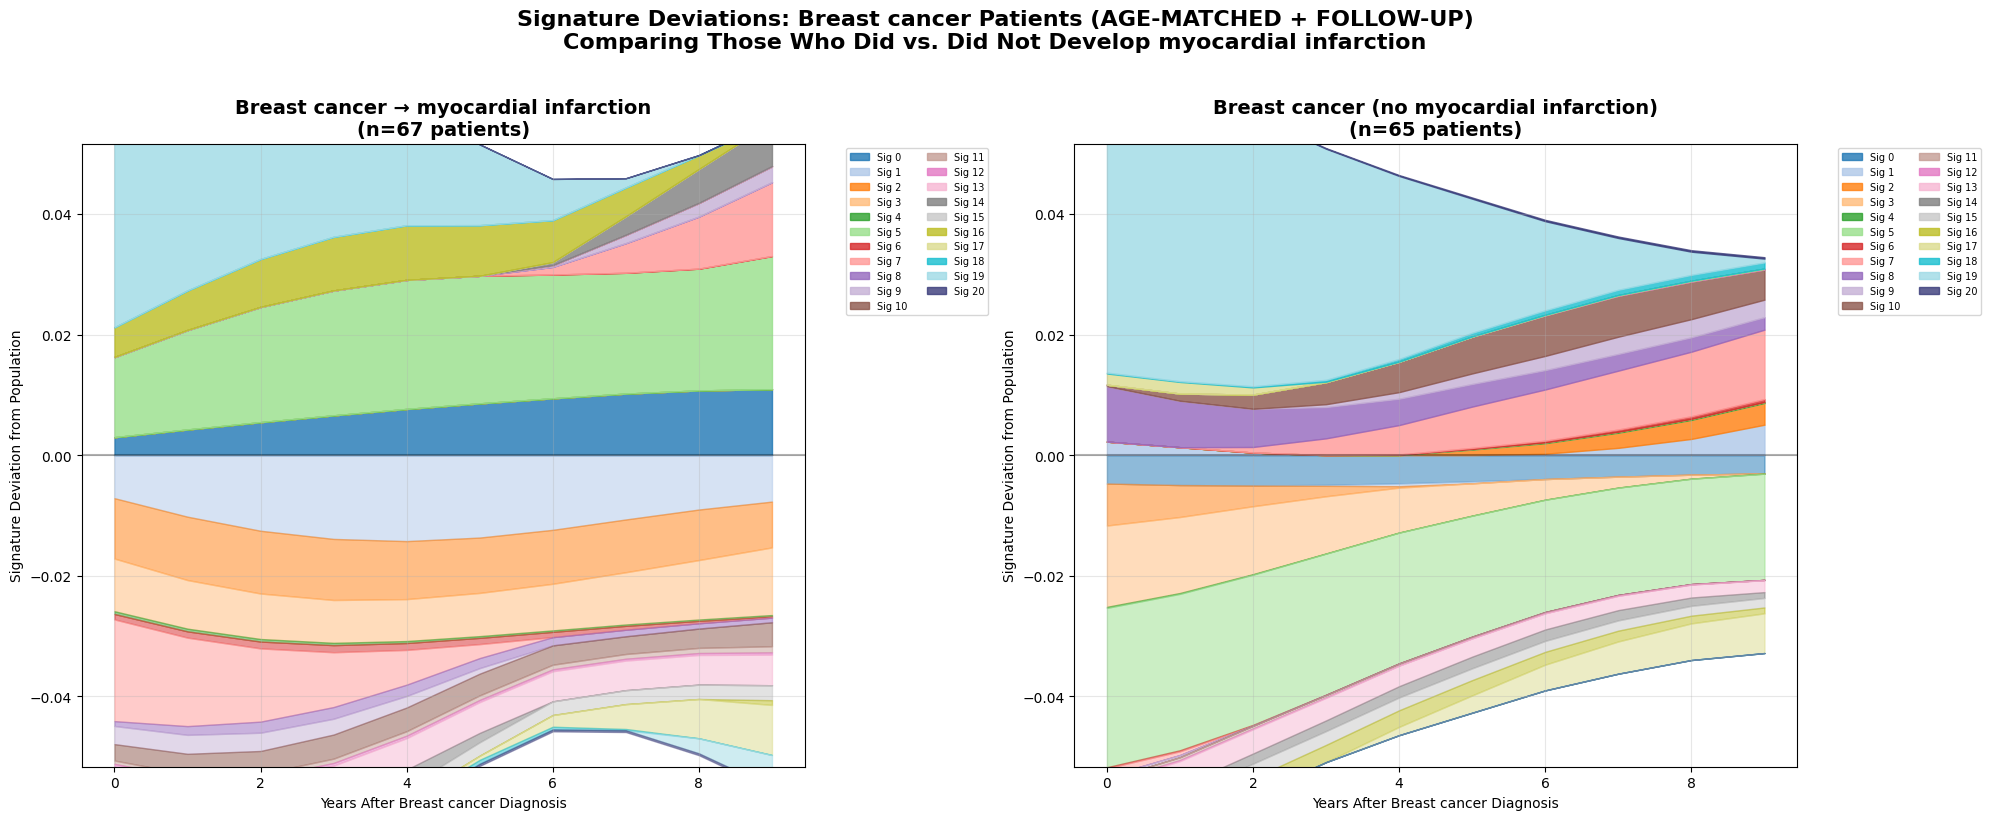

In [6]:
import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')


from pathway_discovery import load_full_data
from plot_transition_deviations import plot_transition_vs_nontransition_deviations_fixed

# Load data

results = plot_transition_vs_nontransition_deviations_fixed(
    transition_disease_name='Breast cancer',
    target_disease_name='myocardial infarction',
    Y=Y,
    thetas=thetas,
    disease_names=disease_names,
    years_before=10,
    age_tolerance=5,      # Match within ±5 years
    min_followup=5,       # Minimum 5 years follow-up
    save_plots=True
)

COMPARING MI PATIENTS WITH vs WITHOUT BREAST CANCER
Target disease: myocardial infarction
Precursor disease: Breast cancer
Found target disease: Myocardial infarction (index 112)
Found transition disease: Breast cancer [female] (index 16)
Population reference shape: (21, 52)
Found 24920 patients with myocardial infarction

Initial MI patient groups:
  With Breast cancer: 64 patients
  Without Breast cancer: 24856 patients

=== AGE MATCHING AT MI DIAGNOSIS ===
Age tolerance: ±5 years
Min follow-up: 5 years
Age at MI for precursor group: 50.0 - 80.0
Found 64 age-matched pairs

=== FOLLOW-UP CHECK ===
Control patient 54955: only 4.0 years follow-up (excluded)
Control patient 193223: only 4.0 years follow-up (excluded)
Control patient 171029: only 1.0 years follow-up (excluded)
Control patient 317663: only 1.0 years follow-up (excluded)
Control patient 253705: only 2.0 years follow-up (excluded)
Control patient 207727: only 0.0 years follow-up (excluded)
Control patient 316265: only 3.0 ye

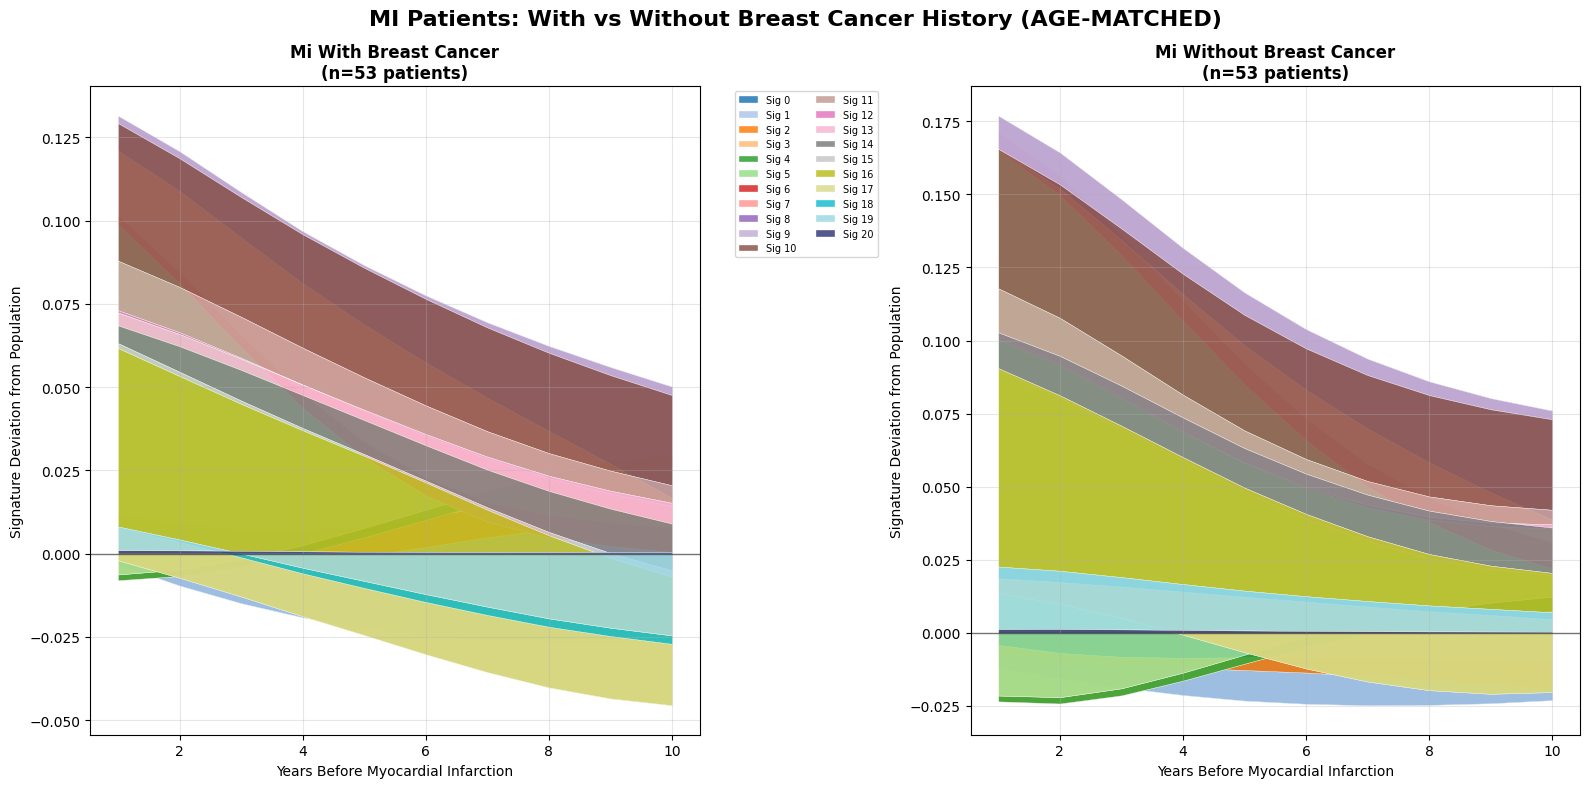


=== SUMMARY STATISTICS (AGE-MATCHED) ===
MI patients with Breast cancer: 53
MI patients without Breast cancer: 53

Mean signature deviations:
MI with Breast cancer:
  Sig 0: -0.0199
  Sig 1: +0.0223
  Sig 2: +0.0100
  Sig 3: -0.0042
  Sig 4: +0.0029
  Sig 5: +0.0290
  Sig 6: -0.0051
  Sig 7: +0.0310
  Sig 8: +0.0200
  Sig 9: -0.0017
  Sig 10: -0.0332
  Sig 11: -0.0100
  Sig 12: +0.0002
  Sig 13: -0.0041
  Sig 14: -0.0104
  Sig 15: -0.0011
  Sig 16: -0.0519
  Sig 17: +0.0148
  Sig 18: +0.0018
  Sig 19: +0.0101
  Sig 20: -0.0006

MI without Breast cancer:
  Sig 0: -0.0211
  Sig 1: +0.0078
  Sig 2: +0.0054
  Sig 3: -0.0005
  Sig 4: +0.0033
  Sig 5: +0.0966
  Sig 6: -0.0074
  Sig 7: +0.0124
  Sig 8: +0.0213
  Sig 9: -0.0073
  Sig 10: -0.0390
  Sig 11: -0.0110
  Sig 12: +0.0002
  Sig 13: +0.0029
  Sig 14: -0.0152
  Sig 15: +0.0012
  Sig 16: -0.0565
  Sig 17: +0.0184
  Sig 18: +0.0026
  Sig 19: -0.0134
  Sig 20: -0.0008

Difference (with - without):
  Sig 0: +0.0013 ↑
  Sig 1: +0.0145 ↑
  S

In [7]:
from plot_mi_with_vs_without_precursor import plot_mi_with_vs_without_precursor

# Compare MI patients who had RA vs MI patients who did NOT have RA
mi_comparison_results = plot_mi_with_vs_without_precursor(
    transition_disease_name='Breast cancer',
    target_disease_name='myocardial infarction',
    Y=Y,
    thetas=thetas,
    disease_names=disease_names,
    years_before=10,
    age_tolerance=5,      # Match within ±5 years
    min_followup=5,       # Minimum 5 years follow-up
    save_plots=True
)